<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/NN_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

Data=fetch_openml('mnist_784')

In [0]:
X,y_actual=Data["data"][:1000]/10000,Data["target"][:1000]

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

def show_imag(X,y_actual,position):
  img=X[position]
  imag=img.reshape(int(np.sqrt(img.size)),int(np.sqrt(img.size)))
  plt.imshow(imag,cmap = matplotlib.cm.binary, interpolation="nearest")
  plt.show()
  print(y_actual[position]) 

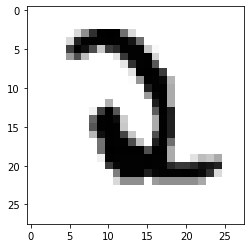

2


In [6]:
show_imag(X,y_actual,400)

In [0]:
def convert_binary(y_actual):
  y1=np.zeros((len(y_actual),10))
  for i in range(len(y_actual)):
    y1[i][int(y_actual[i])]=1
    
    
  return y1

In [0]:
NumHlayers=10
NumHunits=30

In [87]:
y=convert_binary(y_actual)
m,n=np.shape(X)
p,s=np.shape(y)
X_with_bias=np.c_[np.ones((m,1)),X]
hidden=np.ones((NumHlayers,m,NumHunits+1))
z=np.ones((NumHlayers,m,NumHunits))
a=np.ones((NumHlayers,m,NumHunits))
d=np.ones((NumHlayers,m,NumHunits+1))
ITheta=np.random.rand(n+1,NumHunits)
#Igrad=np.zeros((n+1,NumHunits))
HTheta=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HGrad=np.zeros((NumHlayers,NumHunits+1))
ETheta=np.random.rand(NumHunits+1,s)
#EGrad=np.zeros((NumHunits+1,s))

z[0]=np.matmul(X_with_bias,ITheta)
a[0]=1/(1+np.exp(-1*z[0]))
hidden[0]=np.c_[np.ones((m,1)),a[0]]
for i in range(NumHlayers-1):
  z[i+1]=np.matmul(hidden[i],HTheta[i])
  a[i+1]=1/(1+np.exp(-1*z[i+1]))
  hidden[i+1]=np.c_[np.ones((m,1)),a[i+1]]
pred=1/(1+np.exp(-1*np.matmul(hidden[i+1],ETheta)))
print(pred[999],y[999])
cost=sum(((pred-y)**2).transpose()).reshape(-1,1)
dpred=pred-y
#Egrad_init=np.zeros((m,NumHunits+1,s))
Egrad=np.matmul((hidden[NumHlayers-1].transpose()),(2*dpred)*(pred*(1-pred)))/1000
HGrad[NumHlayers-1]=sum(np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())).reshape(1,-1)
for j in range()


[0.9999989  0.99999992 0.99999941 0.99999635 0.99999994 0.99999998
 0.99999965 0.99999987 0.99999978 0.99999764] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [86]:
HGrad[NumHlayers-1]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
p=np.array([[1,2],[3,4]])
q=np.array([[1,2],[3,4]])
p*q

array([[ 1,  4],
       [ 9, 16]])

In [88]:
for k in range(10):
  print(k)

0
1
2
3
4
5
6
7
8
9


In [48]:
Egrad[1,1]

1.6022510786692108e-06

In [21]:
print(m,n)

1000 784


In [70]:
np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())

array([[4.03189002e-06, 3.71910499e-06, 1.47702775e-06, ...,
        3.76068274e-06, 2.27065486e-06, 2.62186741e-06],
       [3.89500072e-06, 4.33171692e-06, 1.57319558e-06, ...,
        3.71384308e-06, 2.94100648e-06, 2.78786031e-06],
       [4.11301931e-06, 4.52248102e-06, 1.79153439e-06, ...,
        3.68718984e-06, 2.90510182e-06, 2.73021410e-06],
       ...,
       [3.89500072e-06, 4.33171692e-06, 1.57319558e-06, ...,
        3.71384308e-06, 2.94100648e-06, 2.78786031e-06],
       [3.71944100e-06, 3.18432251e-06, 1.59648407e-06, ...,
        3.27022113e-06, 2.10094851e-06, 2.23601549e-06],
       [3.71584012e-06, 4.12456404e-06, 1.73004104e-06, ...,
        3.18866793e-06, 2.92929200e-06, 2.27633303e-06]])

In [71]:
Egrad

array([[2.97837036e-07, 1.82770038e-07, 1.77695746e-06, 1.37761919e-06,
        8.01244376e-08, 1.43680986e-06, 5.43513683e-07, 7.17583827e-08,
        1.20485593e-06, 2.10597697e-07],
       [2.97837029e-07, 1.82770033e-07, 1.77695742e-06, 1.37761916e-06,
        8.01244358e-08, 1.43680983e-06, 5.43513671e-07, 7.17583810e-08,
        1.20485590e-06, 2.10597693e-07],
       [2.97836823e-07, 1.82769907e-07, 1.77695619e-06, 1.37761821e-06,
        8.01243804e-08, 1.43680884e-06, 5.43513295e-07, 7.17583314e-08,
        1.20485507e-06, 2.10597547e-07],
       [2.97837024e-07, 1.82770030e-07, 1.77695738e-06, 1.37761914e-06,
        8.01244343e-08, 1.43680981e-06, 5.43513661e-07, 7.17583797e-08,
        1.20485588e-06, 2.10597689e-07],
       [2.97836912e-07, 1.82769962e-07, 1.77695672e-06, 1.37761862e-06,
        8.01244042e-08, 1.43680927e-06, 5.43513457e-07, 7.17583528e-08,
        1.20485543e-06, 2.10597610e-07],
       [2.97837031e-07, 1.82770035e-07, 1.77695743e-06, 1.37761917e-06,
   

In [72]:
pred

array([[0.99999984, 0.9999999 , 0.99999901, ..., 0.99999996, 0.99999934,
        0.99999988],
       [0.99999984, 0.9999999 , 0.99999901, ..., 0.99999996, 0.99999934,
        0.99999988],
       [0.99999984, 0.9999999 , 0.99999901, ..., 0.99999996, 0.99999934,
        0.99999988],
       ...,
       [0.99999984, 0.9999999 , 0.99999901, ..., 0.99999996, 0.99999934,
        0.99999988],
       [0.99999984, 0.9999999 , 0.99999901, ..., 0.99999996, 0.99999934,
        0.99999988],
       [0.99999984, 0.9999999 , 0.99999901, ..., 0.99999996, 0.99999934,
        0.99999988]])

In [73]:
ETheta

array([[0.88655622, 0.05624732, 0.90890827, 0.30810495, 0.83099961,
        0.09828425, 0.78608128, 0.67335575, 0.57741514, 0.4471608 ],
       [0.80248152, 0.13046147, 0.26368829, 0.92968591, 0.82568357,
        0.55441095, 0.7865178 , 0.24497938, 0.66252139, 0.23655989],
       [0.72084563, 0.9472338 , 0.08315038, 0.14120214, 0.21690351,
        0.21102547, 0.13487393, 0.14368889, 0.29542551, 0.69701223],
       [0.43164007, 0.1067416 , 0.36998048, 0.38358609, 0.0026059 ,
        0.32618407, 0.6048448 , 0.0646968 , 0.30344236, 0.03930616],
       [0.51510842, 0.47174006, 0.53495522, 0.34387943, 0.2682669 ,
        0.32632138, 0.90286229, 0.29843816, 0.36140648, 0.89668056],
       [0.11047551, 0.78556467, 0.22151342, 0.51774092, 0.62491049,
        0.36170313, 0.21218136, 0.2077134 , 0.50804208, 0.93176139],
       [0.66680223, 0.88516235, 0.6086645 , 0.74955084, 0.86250863,
        0.49189932, 0.19285159, 0.59687249, 0.67055951, 0.22508006],
       [0.86087381, 0.61423788, 0.4099467